# Spam Detection Filter Using Natural Language Processing ( NLP ) :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk


 <br>
We'll be using a dataset from the UCI datasets!<br>
The file we are using contains a collection of more than 5 thousand SMS phone messages.<br>


In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [3]:
messages = [line.rstrip() for line in open('smsspamcollection\SMSSpamCollection')]
print('Total Messages Are :', len(messages))

Total Messages Are : 5574


In [4]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod


 <br>
ham- ham means regular Message<br>
spam- span means unwanted, commercial message<br>
Due to the spacing we can tell that this is a TSV ("tab separated values") file, where the first column is a label saying whether the given message is a normal message (commonly known as "ham") or "spam". The second column is the message itself. (Note our numbers aren't part of the file, they are just from the enumerate call).<br>
Using these labeled ham and spam examples, we'll train a machine learning model to learn to discriminate between ham/spam automatically. Then, with a trained model, we'll be able to classify arbitrary unlabeled messages as ham or spam<br>


In [5]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['labels', 'message'])
print(messages.head())

  labels                                            message
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


In [6]:
print('\n')

In [7]:
print(messages.describe())
print('\n')
print(messages.info())
print('\n')
print(messages.isnull().sum())

       labels                 message
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


labels     0
message    0
dtype: int64


In [8]:
print('\n')

In [9]:
print(messages.groupby('labels').describe())

       message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4


In [10]:
messages['length'] = messages['message'].apply(len)
print('\n')
print(messages.head())



  labels                                            message  length
0    ham  Go until jurong point, crazy.. Available only ...     111
1    ham                      Ok lar... Joking wif u oni...      29
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3    ham  U dun say so early hor... U c already then say...      49
4    ham  Nah I don't think he goes to usf, he lives aro...      61


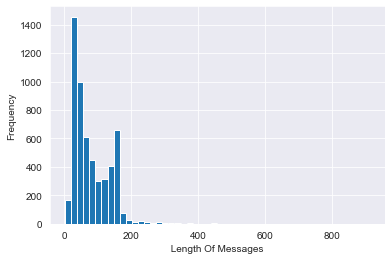

In [11]:
sns.set_style('darkgrid')
messages['length'].plot(kind='hist', bins=50)
plt.xlabel(' Length Of Messages ')
plt.show()


 <br>
the x-axis goes all the way to 1000ish, this must mean that there is some really long messages..<br>


In [12]:
print('\n')

In [13]:
print(messages.length.describe())

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64


In [14]:
print(messages[messages['length'] == 910])

     labels                                            message  length
1085    ham  For me the love should start with attraction.i...     910


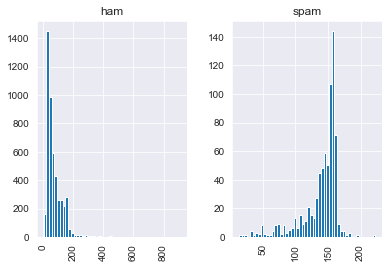

In [15]:
messages.hist(column='length', by='labels', bins=50)
plt.show()

##  Text Pre-processing :



 <br>
First we will create a function which will remove punctuation marks from strings<br>
and will join them to create a string without punctuation marks..<br>


In [16]:
import string

In [17]:
mess = 'Sample Message! Notice: It has punctuation'
print(mess)
print('\n')
nopunc=[char for char in mess if char not in string.punctuation]

Sample Message! Notice: It has punctuation




In [19]:
print(nopunc)
"""
we will have a output like this:
['S', 'a', 'm', 'p', 'l', 'e', ' ', 'M', 'e', 's', 's', 'a', 'g', 'e', 'N', 'o', 't', 'i', 'c', 'e', ' ', 'I', 't', ' ', 'h', 'a', 's', ' ', 'p', 'u', 'n', 'c', 't', 'u', 'a', 't', 'i', 'o', 'n']
"""

['S', 'a', 'm', 'p', 'l', 'e', ' ', 'M', 'e', 's', 's', 'a', 'g', 'e', ' ', 'N', 'o', 't', 'i', 'c', 'e', ' ', 'I', 't', ' ', 'h', 'a', 's', ' ', 'p', 'u', 'n', 'c', 't', 'u', 'a', 't', 'i', 'o', 'n']


"\nwe will have a output like this:\n['S', 'a', 'm', 'p', 'l', 'e', ' ', 'M', 'e', 's', 's', 'a', 'g', 'e', 'N', 'o', 't', 'i', 'c', 'e', ' ', 'I', 't', ' ', 'h', 'a', 's', ' ', 'p', 'u', 'n', 'c', 't', 'u', 'a', 't', 'i', 'o', 'n']\n"

In [20]:
"""
Let us join all this words to make a string again:
"""
nopunc=''.join(nopunc)
print('\n')
print(nopunc)



Sample Message Notice It has punctuation


In [21]:
from nltk.corpus import stopwords
print('Some Top Stopwords From nltk.corpus Are :',stopwords.words('english')[0:10])
print('\n')
sep_mess=nopunc.split()
print(sep_mess)

Some Top Stopwords From nltk.corpus Are : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


['Sample', 'Message', 'Notice', 'It', 'has', 'punctuation']


In [22]:
print('\n')

In [24]:
clean_mess=[word for word in sep_mess if word.lower() not in stopwords.words('english')]
print(clean_mess)
print('\n')
""" 
Now let us repeat this process again on our actual dataframe:


    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
 
    # Check characters to see if they are in punctuation
    
       # Join the characters again to form the string.
    
    # Now just remove any stopwords
    """

['Sample', 'Message', 'Notice', 'punctuation']




' \nNow let us repeat this process again on our actual dataframe:\n\n\n    Takes in a string of text, then performs the following:\n    1. Remove all punctuation\n    2. Remove all stopwords\n    3. Returns a list of the cleaned text\n \n    # Check characters to see if they are in punctuation\n    \n       # Join the characters again to form the string.\n    \n    # Now just remove any stopwords\n    '

In [25]:


def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
print('Original Dataframe :')
print('\n')
print(messages.head(5))
print('\n')
print('Modified Clean Messages After Removing Stopwords : ')
print('\n')
mod=messages['message'].head(5).apply(text_process)
print(mod)
print('\n')


Original Dataframe :


  labels                                            message  length
0    ham  Go until jurong point, crazy.. Available only ...     111
1    ham                      Ok lar... Joking wif u oni...      29
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3    ham  U dun say so early hor... U c already then say...      49
4    ham  Nah I don't think he goes to usf, he lives aro...      61


Modified Clean Messages After Removing Stopwords : 


0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object




### Vectorisation Of Words :

In [26]:


from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(messages['message'])

#Print length of voabulary of words in our Sparse Matrix formed using Count Vectoriser()

print(len(bow_transformer.vocabulary_))

#Example :

print('\n')

message5=messages['message'][4]

print(message5)
print('\n')
#Now let's see its vector representation:
bow5=bow_transformer.transform([message5])
print(bow5)
print(bow5.shape)


11425


Nah I don't think he goes to usf, he lives around here though


  (0, 2948)	1
  (0, 4777)	1
  (0, 6123)	1
  (0, 6877)	1
  (0, 7842)	1
  (0, 10433)	1
  (0, 10450)	1
  (0, 10799)	1
(1, 11425)


In [27]:
""" 
Now we can use .transform on our Bag-of-Words (bow) transformed object and transform the 
entire DataFrame of messages. 
Let's go ahead and check out how the bag-of-words counts for the entire SMS corpus 
is a large, sparse matrix:

"""

" \nNow we can use .transform on our Bag-of-Words (bow) transformed object and transform the \nentire DataFrame of messages. \nLet's go ahead and check out how the bag-of-words counts for the entire SMS corpus \nis a large, sparse matrix:\n\n"

In [29]:


messages_bow=bow_transformer.transform(messages['message'])
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf=TfidfTransformer().fit(messages_bow)
messages_tfidf=tfidf.transform(messages_bow)
print(messages_tfidf.shape)


Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548
(5572, 11425)


### Training Model :

In [30]:
#The Naive Bayes classifier algorithm is a good choice : 

In [31]:


from sklearn.naive_bayes import  MultinomialNB
spam_detect_model=MultinomialNB().fit(messages_tfidf,messages['labels'])


In [32]:
"""
Evaluation Of Model :
"""
tfidf5=tfidf.transform(bow5)
print('Predicted : ',spam_detect_model.predict(tfidf5[0]))
print('Actual : ',messages['labels'][4])

Predicted :  ['ham']
Actual :  ham


In [49]:
df2=pd.DataFrame({'Predicted Values':all_pred,'Actual Values':messages['labels']})
df2.head(10)

,Predicted Values,Actual Values
0,ham,ham
1,ham,ham
2,spam,spam
3,ham,ham
4,ham,ham
5,ham,spam
6,ham,ham
7,ham,ham
8,spam,spam
9,spam,spam


###  Model Evaluation : 


In [50]:
all_pred=spam_detect_model.predict(messages_tfidf)
print(all_pred)
from sklearn.metrics import classification_report,accuracy_score

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [53]:
print(classification_report(messages['labels'],all_pred))
print('\n')
print('The Accuracy Score : ',round(accuracy_score(messages['labels'],all_pred)))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



The Accuracy Score :  1.0


###### The Model which we create above has the sama dataset, same features and target , that s why it has 100 % accuracy...Let us make a new model with spliting our data and then testing it against it:

### Now let us Create A perfect Model with Spliting Of Data :


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['labels'],test_size=0.2)

#####  Creating a Data PipelineLet's run our model again and then predict off the test set.  We will use SciKit Learn's pipeline capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use.


In [37]:
from sklearn.pipeline import Pipeline

In [38]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [39]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001D6537BF4C0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [40]:
predictions=pipeline.predict(msg_test)

In [48]:
df3=pd.DataFrame({'Predicted Values':predictions,'Actual Values':label_test})
df3.head(10)

,Predicted Values,Actual Values
4979,ham,ham
1143,ham,ham
5412,ham,ham
501,ham,ham
4660,ham,ham
411,ham,ham
740,ham,ham
269,ham,ham
4516,ham,ham
2342,ham,ham


In [41]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1014
        spam       0.74      1.00      0.85       101

    accuracy                           0.97      1115
   macro avg       0.87      0.98      0.92      1115
weighted avg       0.98      0.97      0.97      1115

